In [1]:
# Import required libraries
import pandas as pd
import dash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input, Output
import plotly.express as px
print('Complete')

C:\Users\Shin\AppData\Local\Temp\ipykernel_31748\2423366366.py:4: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\Shin\AppData\Local\Temp\ipykernel_31748\2423366366.py:5: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc


Complete


In [2]:
import os 
os.getcwd()

'C:\\Users\\Shin\\Downloads\\10. Applied data science capstone\\DS capstone Week3'

In [3]:
df = pd.read_csv(r'spacex_launch_dash.csv')
df.head(2)

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0


In [4]:
(df['Payload Mass (kg)'] > 1000) & (df['Payload Mass (kg)'] <8000)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8      True
9      True
10     True
11     True
12     True
13    False
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34    False
35     True
36     True
37     True
38     True
39     True
40     True
41     True
42     True
43     True
44     True
45     True
46     True
47     True
48     True
49     True
50     True
51     True
52     True
53     True
54    False
55     True
Name: Payload Mass (kg), dtype: bool

In [7]:
LaunchSites = df['Launch Site'].unique().tolist()
LaunchSites.append('All')
options = [{'label': site, 'value': site} for site in LaunchSites]
# Read the airline data into pandas dataframe
# spacex_df = pd.read_csv("spacex_launch_dash.csv")
max_payload = df['Payload Mass (kg)'].max()
min_payload = df['Payload Mass (kg)'].min()
options

[{'label': 'CCAFS LC-40', 'value': 'CCAFS LC-40'},
 {'label': 'VAFB SLC-4E', 'value': 'VAFB SLC-4E'},
 {'label': 'KSC LC-39A', 'value': 'KSC LC-39A'},
 {'label': 'CCAFS SLC-40', 'value': 'CCAFS SLC-40'},
 {'label': 'All', 'value': 'All'}]

In [8]:
df['class'].value_counts().to_list()

[32, 24]

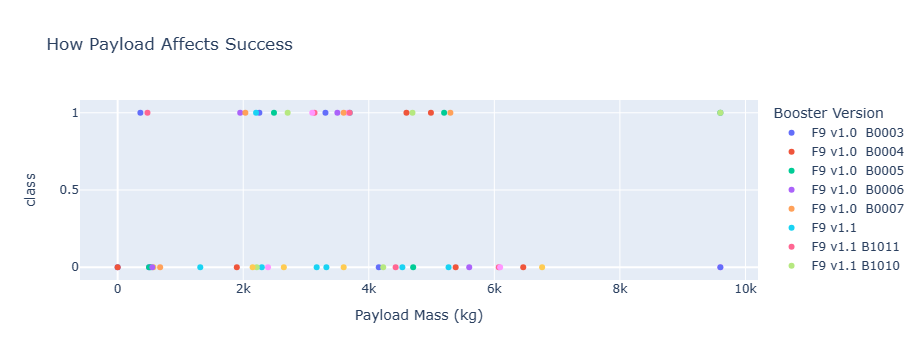

In [9]:
fig = px.scatter(df, x='Payload Mass (kg)', y='class',
                 color='Booster Version',
                 title='How Payload Affects Success')

fig.show()

In [10]:
# Create a dash application
app = dash.Dash(__name__)

# Create an app layout
app.layout = html.Div(children=[html.H1('SpaceX Launch Records Dashboard',
                                        style={'textAlign': 'center', 'color': '#503D36',
                                               'font-size': 40}),
                                # TASK 1: Add a dropdown list to enable Launch Site selection
                                # The default select value is for ALL sites
                                dcc.Dropdown(id='site-dropdown',
                                             options = options, 
                                             value='All',
                                             placeholder='Select a launch site here', 
                                             searchable=True),
                                             
                                html.Br(),

                                # TASK 2: Add a pie chart to show the total successful launches count for all sites
                                # If a specific launch site was selected, show the Success vs. Failed counts for the site
                                html.Div(dcc.Graph(id='success-pie-chart')),
                                html.Br(),

                                html.P("Payload range (Kg):"),
                                # TASK 3: Add a slider to select payload range
                                dcc.RangeSlider(id='payload-slider',
                                                min=0, 
                                                max=10000, 
                                                step=1000,
                                                value=[min_payload, max_payload]
                                               ),

                                # TASK 4: Add a scatter chart to show the correlation between payload and launch success
                                html.Div(
                                    # id='test'
                                    dcc.Graph(id='success-payload-scatter-chart')
                                ),
                                ])

# TASK 2:
# Add a callback function for `site-dropdown` as input, `success-pie-chart` as output
@app.callback(Output(component_id='success-pie-chart', component_property='figure'), 
              Input(component_id='site-dropdown', component_property='value'))

def get_pie_chart(entered_site):
    if entered_site == 'All':
        fig = px.pie(df, 
                     values='class', 
                     names='Launch Site', 
                     title='Number of Success Flights by Launch Sites')
        return fig
    else: 
        filtered_df = df[df['Launch Site']==entered_site]
        counts = filtered_df['class'].value_counts().to_list()
        labels = ['Failure', 'Success']
        fig = px.pie(filtered_df, 
                     values=counts, 
                     names=labels, 
                     title=f'Proportion of Success in {entered_site}')
        return fig
    
# TASK 4:
# Add a callback function for `site-dropdown` and `payload-slider` as inputs, `success-payload-scatter-chart` as output
@app.callback(
    Output(component_id='success-payload-scatter-chart',
    #     component_id='test',
        component_property='figure'),
        # component_property='children'),
    [Input(component_id='site-dropdown', component_property='value'),
    Input(component_id='payload-slider', component_property='value')])

def scatter_plot(site, payload_range):
    if site == 'All':
        filtered_df = df[(df['Payload Mass (kg)'] > payload_range[0]) & (df['Payload Mass (kg)'] < payload_range[1])]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', 
                         color='Booster Version',
                         title='How Payload Affects Success Across All Sites')
        return fig
    else: 
        filtered_df = df[(df['Launch Site'] == site) & (df['Payload Mass (kg)'] > payload_range[0]) & (df['Payload Mass (kg)'] < payload_range[1])]
        fig = px.scatter(filtered_df, x='Payload Mass (kg)', y='class', 
                         color='Booster Version',
                         title=f'How Payload Affects Success in {site}')
        return fig

# Run the app
if __name__ == '__main__':
    app.run_server()